In [159]:
result_dict_80 = {}

In [99]:
from efficient_apriori import apriori
from copy import deepcopy
from time import time
from matplotlib import pyplot as plt

In [132]:
class Commit:
    def __init__(self, _hash, date, subj, files):
        self._hash = _hash
        self.date = date
        self.subj = subj
        self.files = files
        
    def __repr__(self):
        return "Commit(_hash=" + self._hash + ", date=" + self.date + ", subj=" + self.subj + ", files=" + ','.join(self.files) + ")"
    
    
class Result:
    def __init__(self, itemsets, rules, calc_time):
        self.itemsets = itemsets
        self.rules = rules
        self.itemsets_size = self.calculate_itemsets_size(itemsets)
        self.rules_size = len(rules)
        self.time = calc_time
        
    def __repr__(self):
        return "itemsets_size=" + str(self.itemsets_size) + ", rules_size=" + str(self.rules_size) + ", time=" + str(self.time)
    
    def calculate_itemsets_size(self, itemsets):
        result = 0
        for value in itemsets.values():
            result += len(value)
        return result
    
    
def not_only_poms(items):
    for item in items:
        if 'pom.xml' not in item:
            return True
    return False

def print_wo_poms(rules):
    print(len(rules))
    for rule in rules:
        if not_only_poms(rule.lhs) or not_only_poms(rule.rhs):
            pretty_print(rule)
            
def pretty_print(_rule):
    rule = deepcopy(_rule)
    rule.lhs = (item.split('/')[-1] for item in rule.lhs)
    rule.rhs = (item.split('/')[-1] for item in rule.rhs)
    print(rule)
            
def calculate_rules(result_dict, transactions, support, confidence):
    start = time()
    support_fraction = support / len(transactions)
    itemsets, rules = apriori(transactions, min_support=support_fraction, min_confidence=confidence)
    calc_time = time() - start
    result_dict[support] = Result(itemsets, rules, calc_time)

In [133]:
with open('commits/th_date_subj_full.txt', 'r') as f:
    raw_commits = f.read().split('\n\n')
    
commits = []
for commit in raw_commits:
    splitted = commit.strip().split('\n', 1)
    if len(splitted) == 1: continue
    header, files = splitted
    _hash, date, subj = header.split('|')
    commits.append(Commit(_hash, date, subj, files.split('\n')))
    
# transactions = [[file.split('/')[-1] for file in commit.files] for commit in commits]
transactions = [commit.files for commit in commits]

In [157]:
for key in sorted(result_dict_90.keys()):
    print(key, result_dict_90[key])

14 itemsets_size=1316, rules_size=6008, time=121.96162676811218
15 itemsets_size=932, rules_size=2838, time=90.57923316955566
16 itemsets_size=848, rules_size=2789, time=67.83086085319519
17 itemsets_size=753, rules_size=2713, time=56.79609394073486
19 itemsets_size=618, rules_size=2683, time=34.03936815261841
21 itemsets_size=470, rules_size=1373, time=19.961445093154907
23 itemsets_size=354, rules_size=768, time=13.321338891983032
25 itemsets_size=282, rules_size=553, time=9.289931058883667
27 itemsets_size=245, rules_size=553, time=6.8122498989105225
40 itemsets_size=118, rules_size=338, time=1.1247649192810059
50 itemsets_size=93, rules_size=338, time=0.4929630756378174
90 itemsets_size=39, rules_size=127, time=0.18994903564453125


In [158]:
for key in sorted(result_dict_95.keys()):
    print(key, result_dict_95[key])

14 itemsets_size=1316, rules_size=4969, time=115.85052394866943
15 itemsets_size=932, rules_size=1998, time=91.93897581100464
16 itemsets_size=848, rules_size=1987, time=73.42487692832947
17 itemsets_size=753, rules_size=1946, time=55.108688831329346
19 itemsets_size=618, rules_size=1937, time=35.27372217178345
21 itemsets_size=470, rules_size=1266, time=22.414185047149658
23 itemsets_size=354, rules_size=692, time=13.878001928329468
25 itemsets_size=282, rules_size=478, time=11.6425142288208
27 itemsets_size=245, rules_size=478, time=6.805371046066284
40 itemsets_size=118, rules_size=297, time=1.1095421314239502
50 itemsets_size=93, rules_size=297, time=0.47572803497314453
90 itemsets_size=39, rules_size=116, time=0.17522311210632324


In [162]:
for key in sorted(result_dict_80.keys()):
    print(key, result_dict_80[key])

14 itemsets_size=1316, rules_size=7277, time=106.57690525054932
15 itemsets_size=932, rules_size=3534, time=79.76156997680664
16 itemsets_size=848, rules_size=3443, time=64.71954393386841
17 itemsets_size=753, rules_size=3292, time=52.12187123298645
19 itemsets_size=618, rules_size=3240, time=31.248124837875366
21 itemsets_size=470, rules_size=1645, time=21.412925958633423
23 itemsets_size=354, rules_size=977, time=14.499430179595947
25 itemsets_size=282, rules_size=759, time=9.440126180648804
27 itemsets_size=245, rules_size=755, time=6.704524993896484
40 itemsets_size=118, rules_size=540, time=1.101928949356079
50 itemsets_size=93, rules_size=539, time=0.47438693046569824
90 itemsets_size=39, rules_size=165, time=0.17603588104248047


In [160]:
keys = sorted(result_dict_95.keys(), reverse=True)
keys

[90, 50, 40, 27, 25, 23, 21, 19, 17, 16, 15, 14]

In [161]:
for i in keys:
    calculate_rules(result_dict_80, transactions, i, 0.8)
    print(i)

90
50
40
27
25
23
21
19
17
16
15
14


In [124]:
result_dict[14].itemsets

{1: {('outbound-feeds/cva-feed/main/resources/spring/th-cva-out-feed-sql.xml',): 81,
  ('th-in-feeds/th-fixml-parser/main/src/ru/sbt/risk/foundation/tradehub/fixml/converters/micex/MicexEquityNodeConverter.kt',): 19,
  ('settings.gradle',): 91,
  ('th-in-feeds/th-fixml-parser/main/src/ru/sbt/risk/foundation/tradehub/config/ConvertersMappingConfig.kt',): 14,
  ('tradehub-projects.gradle',): 53,
  ('th-in-feeds/th-fixml-parser/build.gradle',): 21,
  ('th-in-feeds/th-fixml-parser/test/src/ru/sbt/risk/foundation/tradehub/fixml/selectors/NodeConverterSelectorImplTest.java',): 41,
  ('gradle.properties',): 159,
  ('th-tests/test-data/main/resources/output/functional-test/get-api-test/json/v1/traffic/commodity_swap_physical_aspect_source.json',): 14,
  ('th-in-feeds/th-fixml-parser/main/src/ru/sbt/risk/foundation/tradehub/fixml/converters/CommoditySwapNodeConverter.kt',): 37,
  ('th-in-feeds/th-fixml-parser/main/src/ru/sbt/risk/foundation/tradehub/fixml/converters/CommodityFutureNodeConverter

In [106]:
print_wo_poms(result_dict[14].rules)

4969
{IrLongFutureNodeConverter.kt} -> {IrShortFutureNodeConverter.kt} (conf: 1.000, supp: 0.002, lift: 616.933, conv: 998379079.317)
{com_swap_phys_letter_of_credit_sell_side.json} -> {com_swap_phys_letter_of_credit_buy_side.json} (conf: 1.000, supp: 0.002, lift: 661.000, conv: 998487140.696)
{com_swap_phys_letter_of_credit_buy_side.json} -> {com_swap_phys_letter_of_credit_sell_side.json} (conf: 1.000, supp: 0.002, lift: 661.000, conv: 998487140.696)
{commodity_swap_physical_aspect_source.json} -> {com_swap_phys_letter_of_credit_buy_side.json} (conf: 1.000, supp: 0.002, lift: 661.000, conv: 998487140.696)
{com_swap_phys_letter_of_credit_buy_side.json} -> {commodity_swap_physical_aspect_source.json} (conf: 1.000, supp: 0.002, lift: 661.000, conv: 998487140.696)
{commodity_swap_physical_aspect_source.json} -> {com_swap_phys_letter_of_credit_sell_side.json} (conf: 1.000, supp: 0.002, lift: 661.000, conv: 998487140.696)
{com_swap_phys_letter_of_credit_sell_side.json} -> {commodity_swap_ph

{parmsSelectEquityFutureDeals.sql, parmsSelectFxFutureDeals.sql, parmsSelectIndexFutureDeals.sql, parmsSelectIrsFutureDeals.sql} -> {parmsSelectEquityDeals.sql} (conf: 1.000, supp: 0.002, lift: 544.353, conv: 998162956.559)
{parmsSelectEquityDeals.sql, parmsSelectFxFutureDeals.sql, parmsSelectIndexFutureDeals.sql, parmsSelectIrsFutureDeals.sql} -> {parmsSelectEquityFutureDeals.sql} (conf: 1.000, supp: 0.002, lift: 578.375, conv: 998271017.938)
{parmsSelectEquityDeals.sql, parmsSelectEquityFutureDeals.sql, parmsSelectIndexFutureDeals.sql, parmsSelectIrsFutureDeals.sql} -> {parmsSelectFxFutureDeals.sql} (conf: 1.000, supp: 0.002, lift: 462.700, conv: 997838772.423)
{parmsSelectEquityDeals.sql, parmsSelectEquityFutureDeals.sql, parmsSelectFxFutureDeals.sql, parmsSelectIrsFutureDeals.sql} -> {parmsSelectIndexFutureDeals.sql} (conf: 1.000, supp: 0.002, lift: 616.933, conv: 998379079.317)
{parmsSelectEquityDeals.sql, parmsSelectEquityFutureDeals.sql, parmsSelectFxFutureDeals.sql, parmsSelect

In [143]:
def graph(result_dict):
    supports, itemsets_sizes, times = [], [], []
    for support, result in sorted(result_dict.items()):
        supports.append(support)
        itemsets_sizes.append(result.itemsets_size)
        times.append(result.time)

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(supports, itemsets_sizes, color=color)
    ax1.set_xlabel('support')
    ax1.set_ylabel('itemsets', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    color = 'tab:blue'
    ax2 = ax1.twinx()
    ax2.plot(supports, times)
    ax2.set_ylabel('time (s)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show()

In [151]:
def print_sets_wo_poms(itemsets):
    for sets in itemsets.values():
        for item in sets.keys():
            if len(item) == 1: continue
            if not_only_poms(item):
                print([string.split('/')[-1] for string in item])

In [152]:
print_sets_wo_poms(result_dict_90[14].itemsets)

['settings.gradle', 'tradehub-projects.gradle']
['CommodityFutureNodeConverter.kt', 'EquityFutureNodeConverter.kt']
['CommodityFutureNodeConverter.kt', 'FxFutureNodeConverter.kt']
['CommodityFutureNodeConverter.kt', 'IrShortFutureNodeConverter.kt']
['CommoditySwapClrNodeConverter.kt', 'CommoditySwapNodeConverter.kt']
['CommoditySwapClrNodeConverter.kt', 'CommoditySwapPhysicalNodeConverter.kt']
['CommoditySwapNodeConverter.kt', 'CommoditySwapPhysicalNodeConverter.kt']
['EquityFutureNodeConverter.kt', 'FxFutureNodeConverter.kt']
['IrLongFutureNodeConverter.kt', 'IrShortFutureNodeConverter.kt']
['com_swap_phys_letter_of_credit_buy_side.json', 'com_swap_phys_letter_of_credit_sell_side.json']
['com_swap_phys_letter_of_credit_buy_side.json', 'commodity_swap_physical_aspect_source.json']
['com_swap_phys_letter_of_credit_sell_side.json', 'commodity_swap_physical_aspect_source.json']
['CashflowsConverter.kt', 'CashflowsDto.kt']
['CommoditySwapCrossCurrencyPaymentExtractor.kt', 'CrossCurrencyPay

In [163]:
print_sets_wo_poms(result_dict_80[14].itemsets)

['settings.gradle', 'tradehub-projects.gradle']
['CommodityFutureNodeConverter.kt', 'EquityFutureNodeConverter.kt']
['CommodityFutureNodeConverter.kt', 'FxFutureNodeConverter.kt']
['CommodityFutureNodeConverter.kt', 'IrShortFutureNodeConverter.kt']
['CommoditySwapClrNodeConverter.kt', 'CommoditySwapNodeConverter.kt']
['CommoditySwapClrNodeConverter.kt', 'CommoditySwapPhysicalNodeConverter.kt']
['CommoditySwapNodeConverter.kt', 'CommoditySwapPhysicalNodeConverter.kt']
['EquityFutureNodeConverter.kt', 'FxFutureNodeConverter.kt']
['IrLongFutureNodeConverter.kt', 'IrShortFutureNodeConverter.kt']
['com_swap_phys_letter_of_credit_buy_side.json', 'com_swap_phys_letter_of_credit_sell_side.json']
['com_swap_phys_letter_of_credit_buy_side.json', 'commodity_swap_physical_aspect_source.json']
['com_swap_phys_letter_of_credit_sell_side.json', 'commodity_swap_physical_aspect_source.json']
['CashflowsConverter.kt', 'CashflowsDto.kt']
['CommoditySwapCrossCurrencyPaymentExtractor.kt', 'CrossCurrencyPay

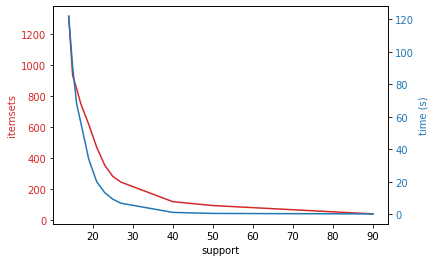

In [153]:
graph(result_dict_90)

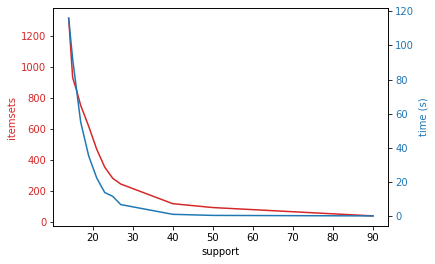

In [154]:
graph(result_dict_95)